In [57]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import Labe`lEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [58]:
filename = "/kaggle/input/iraniran/Customer Churn.csv"
df = pd.read_csv(filename, encoding='unicode_escape')
df.head(10)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
5,11,0,38,1,3775,82,32,28,3,1,1,30,282.280,0
6,4,0,38,0,2360,39,285,18,3,1,1,30,1235.960,0
7,13,0,37,2,9115,121,144,43,3,1,1,30,945.440,0
8,7,0,38,0,13773,169,0,44,3,1,1,30,557.680,0
9,7,0,38,1,4515,83,2,25,3,1,1,30,191.920,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [80]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [78]:
df.drop(columns='Complains')

,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [61]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [62]:
x

array([[8.00000e+00, 0.00000e+00, 3.80000e+01, ..., 1.00000e+00,
        3.00000e+01, 1.97640e+02],
       [0.00000e+00, 0.00000e+00, 3.90000e+01, ..., 2.00000e+00,
        2.50000e+01, 4.60350e+01],
       [1.00000e+01, 0.00000e+00, 3.70000e+01, ..., 1.00000e+00,
        3.00000e+01, 1.53652e+03],
       ...,
       [1.30000e+01, 0.00000e+00, 1.80000e+01, ..., 1.00000e+00,
        3.00000e+01, 2.80320e+02],
       [7.00000e+00, 0.00000e+00, 1.10000e+01, ..., 1.00000e+00,
        3.00000e+01, 1.07764e+03],
       [8.00000e+00, 1.00000e+00, 1.10000e+01, ..., 1.00000e+00,
        3.00000e+01, 1.00680e+02]])

In [63]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=123)

print("x_train = ", len(x_train))
print("x_test = ", len(x_test))
print("y_train = ", len(y_train))
print("y_test = ", len(y_test))

x_train =  2520
x_test =  630
y_train =  2520
y_test =  630


In [65]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [66]:
x_train

array([[-1.04416958, -0.28556096, -1.47630586, ..., -0.57001854,
        -0.12138639, -0.69933577],
       [ 0.33622458, -0.28556096, -0.8898792 , ..., -0.57001854,
        -0.68996207, -0.64065111],
       [ 0.06014575, -0.28556096,  1.10397147, ..., -0.57001854,
        -0.12138639, -0.47576422],
       ...,
       [-1.04416958, -0.28556096,  0.28297414, ...,  1.7543289 ,
        -0.68996207, -0.87982201],
       [ 1.85465814,  3.50187919,  0.04840347, ..., -0.57001854,
        -0.68996207, -0.72725343],
       [ 0.61230341, -0.28556096, -1.5935912 , ..., -0.57001854,
         1.58434063, -0.08995365]])

In [67]:
x_test

array([[-1.04416958, -0.28556096, -0.5380232 , ..., -0.57001854,
        -0.12138639, -0.72374213],
       [-1.04416958, -0.28556096, -0.42073786, ...,  1.7543289 ,
        -0.68996207, -0.91323686],
       [-0.3539725 , -0.28556096, -1.00716453, ..., -0.57001854,
        -0.68996207, -0.44119813],
       ...,
       [-0.49201192, -0.28556096,  0.40025947, ..., -0.57001854,
        -0.12138639,  0.15197064],
       [-1.04416958,  3.50187919,  0.1656888 , ...,  1.7543289 ,
         1.58434063, -0.91323686],
       [ 1.4405399 , -0.28556096,  0.1656888 , ..., -0.57001854,
         1.58434063, -0.4112466 ]])

In [68]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [69]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [71]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [72]:
classifier.predict_proba(x_test)

array([[1.54612250e-02, 9.84538775e-01],
       [5.65938215e-04, 9.99434062e-01],
       [7.07409804e-02, 9.29259020e-01],
       ...,
       [1.00000000e+00, 5.29789310e-21],
       [1.70715655e-17, 1.00000000e+00],
       [1.00000000e+00, 2.55335560e-32]])

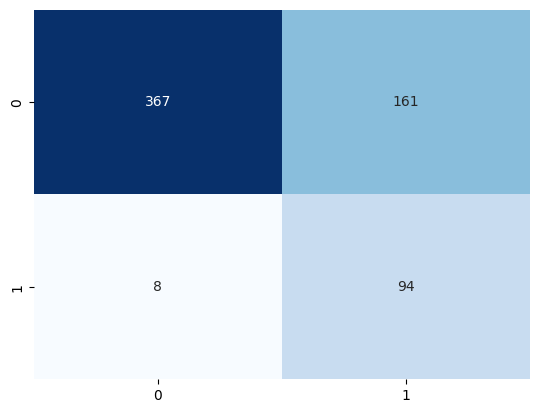

In [83]:
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()

In [74]:
akurasi = classification_report(y_test, y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.98      0.70      0.81       528
           1       0.37      0.92      0.53       102

    accuracy                           0.73       630
   macro avg       0.67      0.81      0.67       630
weighted avg       0.88      0.73      0.77       630



In [75]:
akurasi = accuracy_score(y_test, y_pred)
print("Tingkat Akurasi : %d persen"%(akurasi*100))

Tingkat Akurasi : 73 persen


In [76]:
ydata = pd.DataFrame()
ydata['y_test'] = pd.DataFrame(y_test)
ydata['y_pred'] = pd.DataFrame(y_pred)
ydata

,y_test,y_pred
0,0,1
1,1,1
2,0,1
3,0,0
4,0,0
...,...,...
625,0,0
626,1,0
627,0,0
628,1,1
